In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms

## Classification


Let's use the MNIST dataset of handwritten digits as an example. It is an excellent dataset for those learning pattern recognition techniques in images, as described by the author himself:<br>
http://yann.lecun.com/exdb/mnist/

MNIST consists of **10 classes**, representing digits from 0 to 9, as shown in the following image.
![](https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png)

t is part of the datasets available through the library.<br>```torchvision```<br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.MNIST

Following the Torchvision standardization, we can load the dataset with a simple function call. Each MNIST element is represented in the form of ```(data, label)```.

In [ ]:
MNIST = datasets.MNIST('./',
                      train=False,
                      download=True,
                      transform=transforms.ToTensor())


data, label = MNIST[0]
print(type(data), type(label))

# Channel First: Padrão do torch
print(data.size()) # C x H x W

100%|██████████| 9912422/9912422 [00:00<00:00, 93811822.78it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 22068809.22it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33885648.33it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2484095.55it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28])


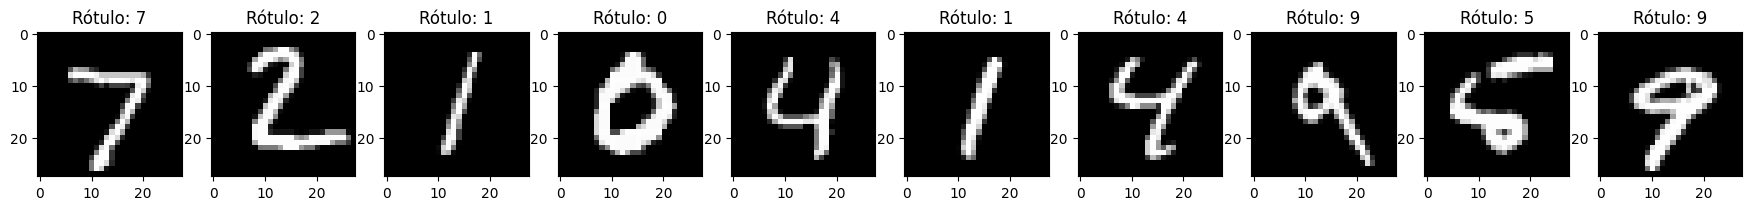

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(22, 4))
for i in range(10):
  data, label = MNIST[i]
  axs[i].imshow(data[0], cmap='gray')
  axs[i].set_title('Rótulo: ' + str(label))
plt.show()

> **Como deve ser a última camada de uma rede cujo objetivo é classificar os dados do MNIST?**
---



### Detection

To illustrate the detection problem, we will use the PascalVOC 2012 dataset:<br>
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/

The [PASCAL Visual Object Classes](http://host.robots.ox.ac.uk/pascal/VOC/) is a project that organizes competitions for developers interested in the challenges of pattern recognition in images. Among the challenges are: detection, segmentation, action recognition, among others. <br>

Detection data can be found in the Torchvision package:<br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.VOCDetection


In [ ]:
coco = datasets.VOCDetection('./',
                             image_set='train',
                             download=True,
                             transform=transforms.ToTensor())

data, label = coco[0]
print(type(data), type(label))

100%|██████████| 1999639040/1999639040 [01:09<00:00, 28935861.17it/s]


Extracting ./VOCtrainval_11-May-2012.tar to ./
<class 'torch.Tensor'> <class 'dict'>


Images in color have **color channels** (RGB: *red, green, blue*). <br>
By default, PyTorch adopts the *channel first* format, meaning **channel first**, referring to the image's dimensionality: **$C \times H \times W$**<br>

On the other hand, visualization libraries like matplotlib represent images with the channel in the last dimension. Therefore, before plotting the image, we need to organize the dimensions.


dimension: torch.Size([442, 500, 3])


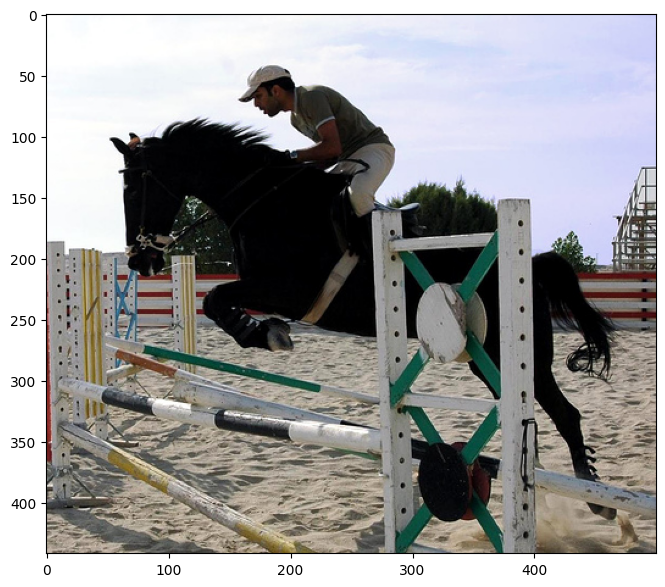

In [ ]:
print('dimension:', data.size())
data, label = coco[0]
data = data.permute(1, 2, 0)

plt.figure(figsize=(8, 7) )
plt.imshow(data)
plt.show()

In [ ]:
label

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

We are interested in the **bounding box** of the label, which in a loose translation would be the "bounding box", a rectangle that defines the location of the object in the image. According to the PascalVOC annotation standard, an object's label can be accessed as follows:
```python
xmax, xmin, ymax, ymin = rotulo['annotation']['object'][0]['bndbox'].values()
```

o visualize the bounding box, we will use matplotlib's ```patches```
```
rect = patches.Rectangle((xmin, ymin),w,h)
```

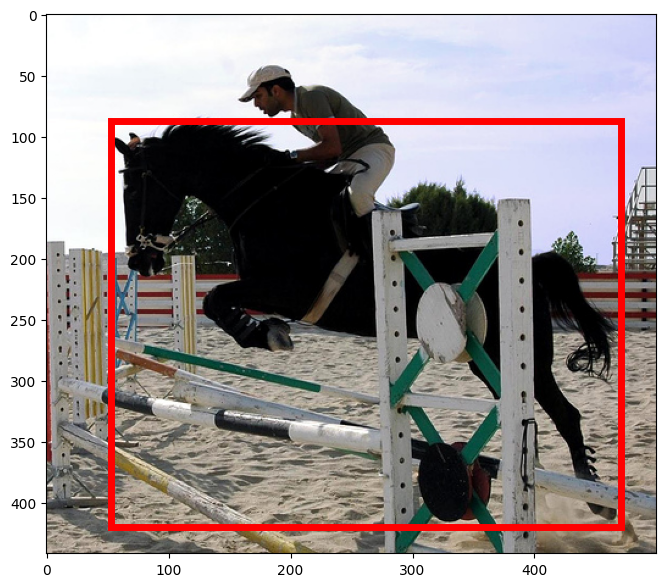

In [ ]:
bbox = label['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 7))
plt.imshow(data)

rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
ax.add_patch(rect)

plt.show()

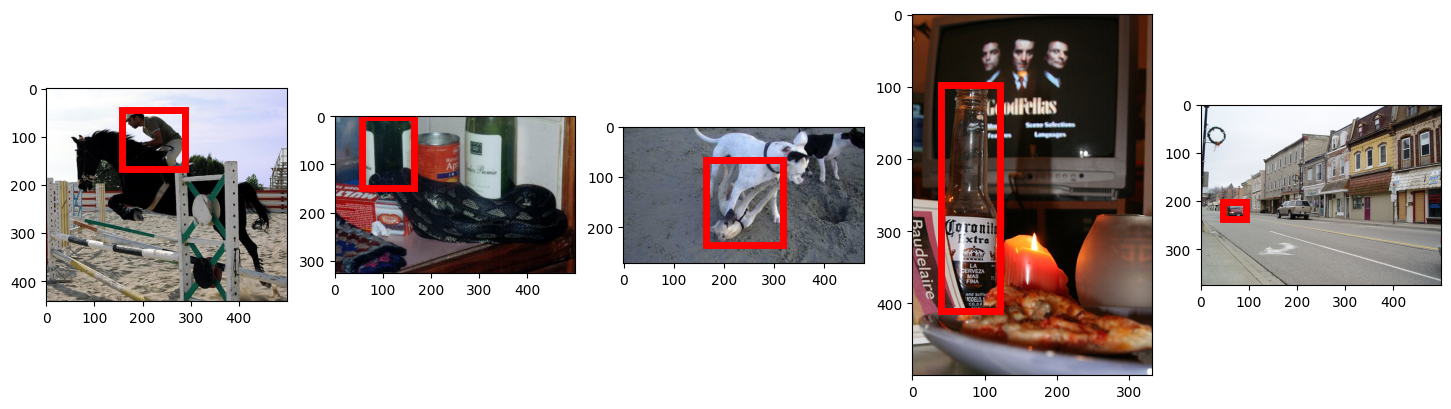

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(18, 7))
for i in range(5):
  data, label = coco[i]
  data = data.permute(1, 2, 0)

  bbox = label['annotation']['object'][1]['bndbox']
  xmax = int(bbox['xmax'])
  xmin = int(bbox['xmin'])
  ymax = int(bbox['ymax'])
  ymin = int(bbox['ymin'])

  axs[i].imshow(data)

  rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
  axs[i].add_patch(rect)

> **Como deve ser a última camada de uma rede cujo objetivo é detectar os objetos do PascalVOC?** <br>
---

## Segmentation


PascalVOC also provides segmentation labels for some of its images, so we will continue using this dataset. <br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.VOCSegmentation

The segmentation task involves **dense labeling**, predicting the exact location of objects in the scene at the pixel level. The following image shows both detection and segmentation labels to clarify the difference.

![](https://www.researchgate.net/profile/Yizhou_Yu/publication/323410937/figure/fig5/AS:644201683361796@1530601058684/The-detection-and-semantic-segmentation-results-on-Pascal-VOC-2012-test-set-the-first_W640.jpg)

Segmentation labels are generally also images, representing the mask over the object to be segmented.

In [ ]:
coco = datasets.VOCSegmentation('./',
                             image_set='train',
                             download=False,
                             transform=transforms.ToTensor(),
                             target_transform=transforms.ToTensor())

data, label = coco[0]
print(type(data), type(label))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
print(data.size(), label.size())

torch.Size([3, 281, 500]) torch.Size([1, 281, 500])


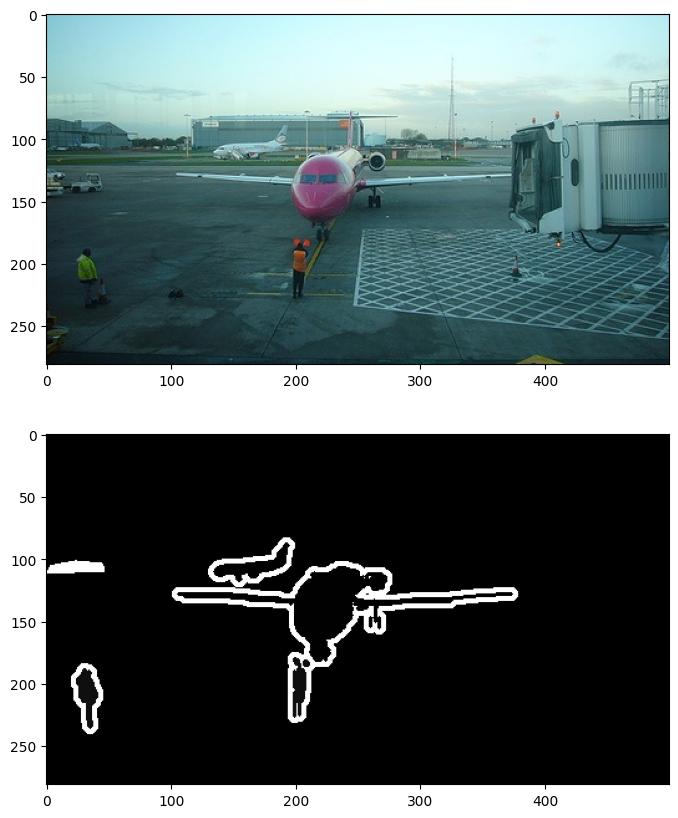

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(10, 10))

#data = data.permute(1, 2, 0)

axs[0].imshow(data)
axs[1].imshow(label[0], cmap='gray')

> In general, neural network-based segmentation approaches do not use fully connected layers; instead, they employ architectures that are **fully convolutional**. By the end of the course, we will have a better understanding of the benefits of this approach.

## Convolution 1D


Before delving into the domain of images, let's understand convolution in a simpler context by working with signals in just one dimension.

Remember: Convolution is the sum of the product between functions, with one of them being **inverted and shifted**. The term Convolution **1D** indicates that this function will be shifted in only one dimension.

---

Let's consider the following problem:<br>
You have decided to collect data from the accelerometer of a cellphone. The goal is to have people walk with the phone in their pocket to analyze how the sensor responds to this movement. As demonstrated in [this study](https://www.researchgate.net/publication/221296054_Impact_of_different_walking_surfaces_on_gait_identification_based_on_higher-order_statistics_of_accelerometer_data/figures?lo=1), the magnitude in the accelerometer signal changes like a kind of **noisy sine wave**.

Next, let's simulate similar data and assume that **we want to identify the increasing intervals in this signal.**


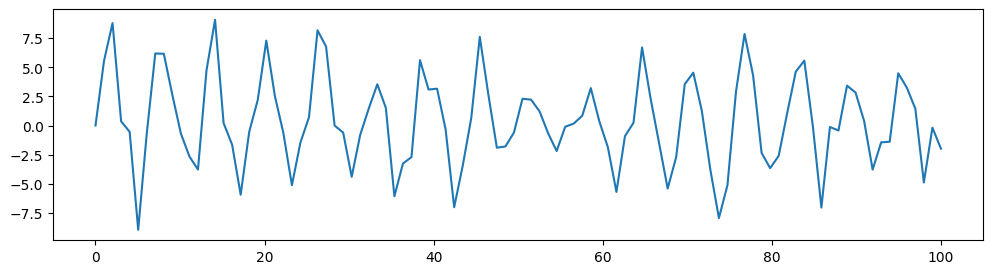

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

x = np.linspace(0, 100, 100)
sin = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(12, 3))
plt.plot(x, sin)


Facilitating Visualization
To make it easier, the following cell presents a function that uses matplotlib to display 1D signals as a vector of values.


In [ ]:
def show(valores, title,):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=18)
  plt.yticks([])

### 1D Representation

We will use a small segment of the signal to illustrate the effect of convolution.


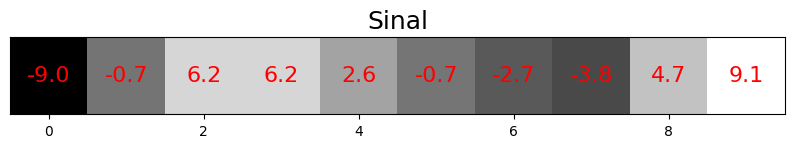

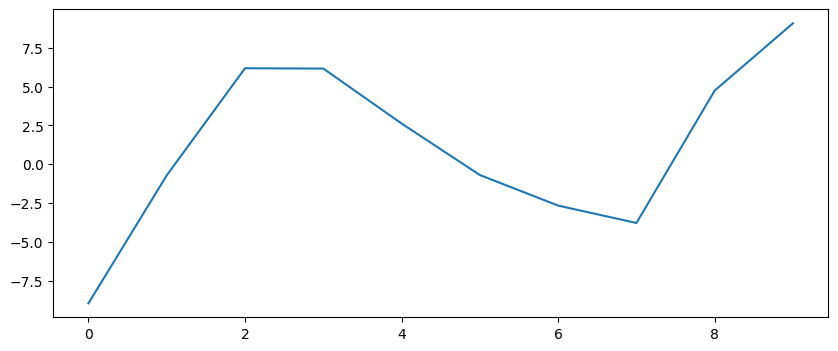

In [ ]:
sinal = sin[5:15]
show(sinal, 'Sinal')

plt.figure(figsize=(10, 4))
plt.plot(sinal)

### Kernel

In the context of image processing, the kernel is a **convolutional filter**. In practical terms, it is an n-dimensional matrix that is applied to the data through convolution.

One can say that convolution **measures similarity** between the two signals.

Therefore, we need to propose a kernel that simulates the desired pattern: increasing intervals.
> But remember that convolution operates on functions after **inverting the kernel**.


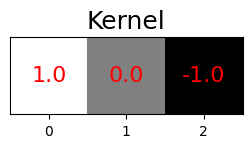

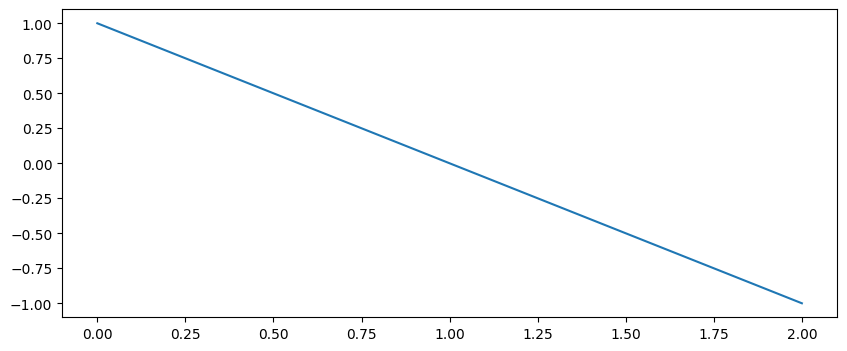

In [ ]:
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')

plt.figure(figsize=(10, 4))
plt.plot(kernel)

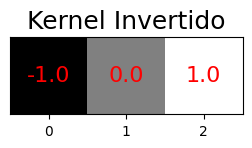

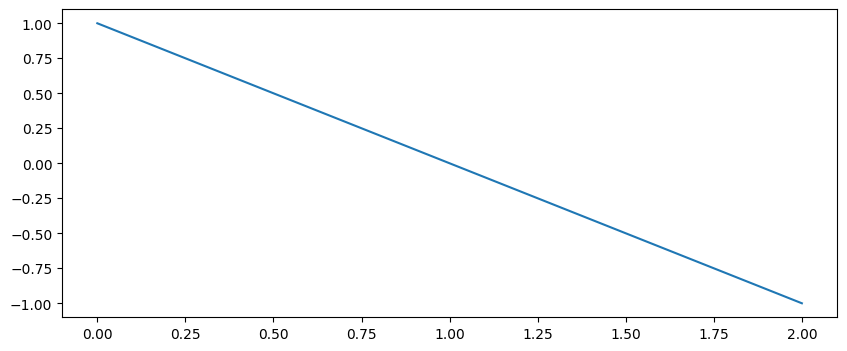

In [ ]:
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

plt.figure(figsize=(10, 4))
plt.plot(kernel)

In the next cell, we will print the kernel **shifting it along the signal** to understand the step-by-step operation.


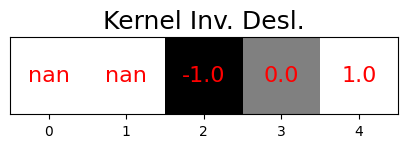

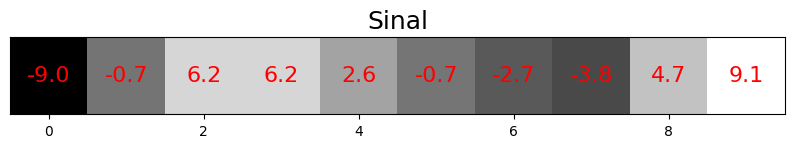

In [ ]:
plt.close('all')

## Vamos alterar o valor de u
## para deslocar o kernel
u=2
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel Inv. Desl.')
show(sinal, 'Sinal')

Now let's compare our calculations with the result of the `convolve` function from the `scipy` library.


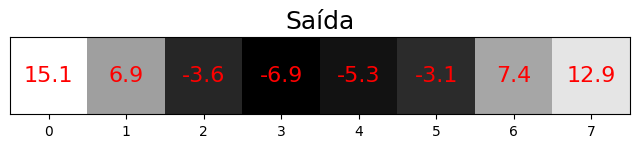

In [ ]:
out = convolve(sinal, kernel, mode='valid')
show(out, 'Saída')

To make it more visual, let's print the resulting function overlaid on the original signal to better understand how this function helps us identify the increasing intervals in the original signal.


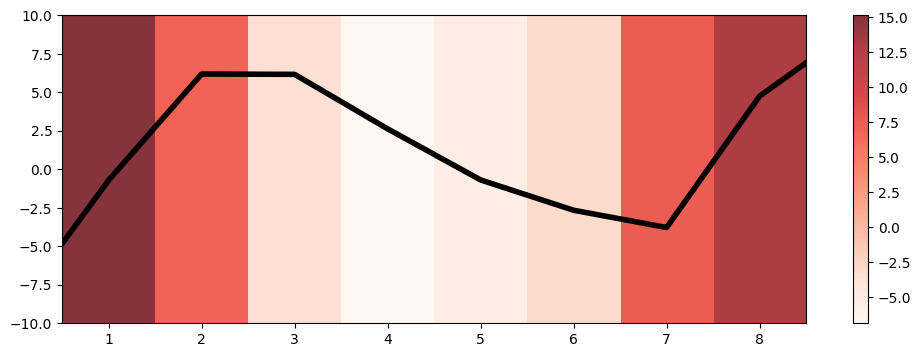

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))
plt.colorbar()

And what if we run it on the rest of the signal as a kind of classification?<br>
In this specific context, we can consider that **activations less than zero** indicate that there is no increasing trend in that interval of the signal.


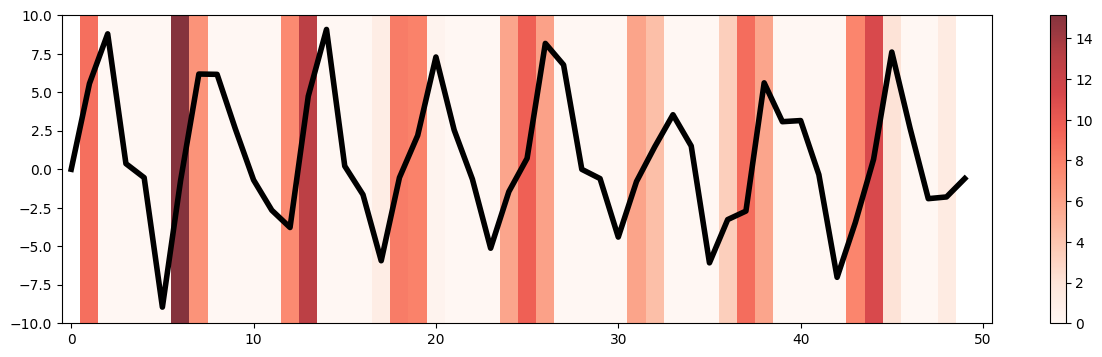

In [ ]:
out = convolve(sin[:50], kernel, mode='valid')
out[out < 0] = 0

plt.figure(figsize=(15, 4))
plt.plot(sin[:50], color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

## Convolution 2D



Now we can start working with images!! 2D convolution involves shifting a kernel along the data, this time being able to move in two dimensions. Similarly, the kernel can also have two dimensions.

In [ ]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

Let's assume that we want to **detect edges in images**. We will use as an example an image of a brick wall:
```python
img = data.brick()
```

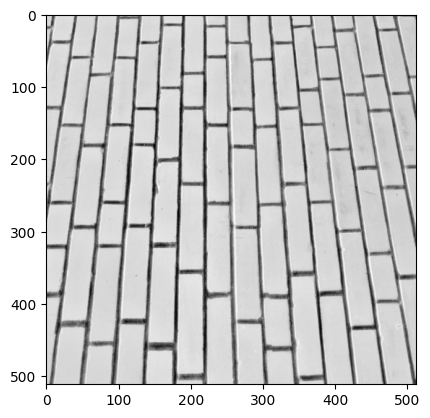

In [ ]:
img = data.brick()
plt.imshow(img, cmap='Greys')

To help us from now on, let's define a method to print kernels as images.

In [ ]:
def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

Let's now define two different kernels
* **Vertical** edge kernel
* **Horizontal** edge kernel


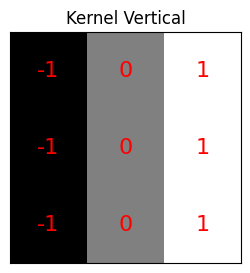

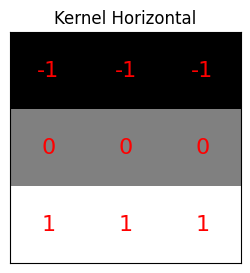

In [ ]:
kernel_v = [ [-1, 0, 1],
             [-1, 0, 1],
             [-1, 0, 1]]

show(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1, -1],
             [0, 0, 0],
             [1, 1, 1]]
show(kernel_h, 'Kernel Horizontal')

Now, let's convolve both kernels with the brick wall and observe the result. Each kernel will highlight different parts of the image!!

The result of the convolution between the data and the kernel is called a **Feature Map** or **Activation Map**.

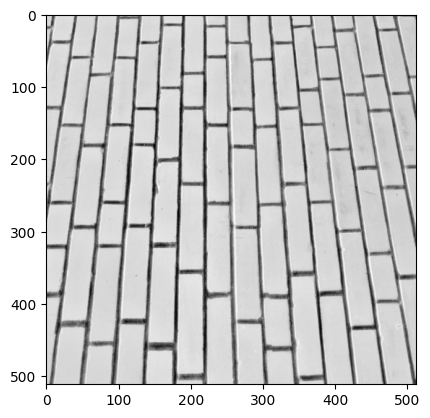

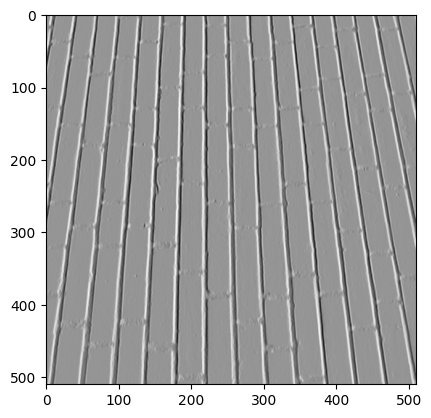

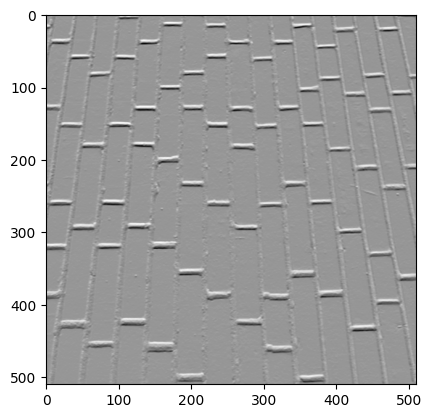

In [ ]:
mapa_de_caracteristicas = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

mapa_de_caracteristicas = convolve(img, kernel_h, mode='valid')
plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

### A Note on Activations

When we define the kernel, it seeks the pattern for which it was designed, but it's worth taking a closer look at its behavior. Let's print the original kernel and its flipped version, which is actually operated on the image during convolution.

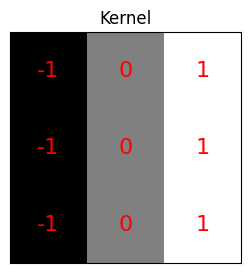

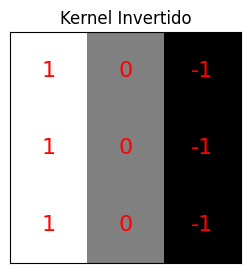

In [ ]:
show(kernel_v, 'Kernel')
show(np.flip(kernel_v), 'Kernel Invertido')

Let's apply this kernel to an image that you might be familiar with. The logo of an online courses company in technology and digital marketing!

In [ ]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

--2024-01-05 19:22:07--  https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png
Resolving is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)... 23.216.68.23, 2600:1408:7:19d::2a1, 2600:1408:7:180::2a1, ...
Connecting to is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)|23.216.68.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30438 (30K) [image/png]
Saving to: ‘1200x630wa.png’

1200x630wa.png      100%[===================>]  29.72K  --.-KB/s    in 0.01s   

2024-01-05 19:22:07 (1.95 MB/s) - ‘1200x630wa.png’ saved [30438/30438]



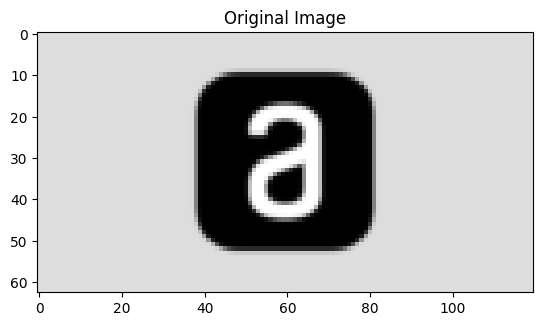

Text(0.5, 1.0, 'Activation Map')

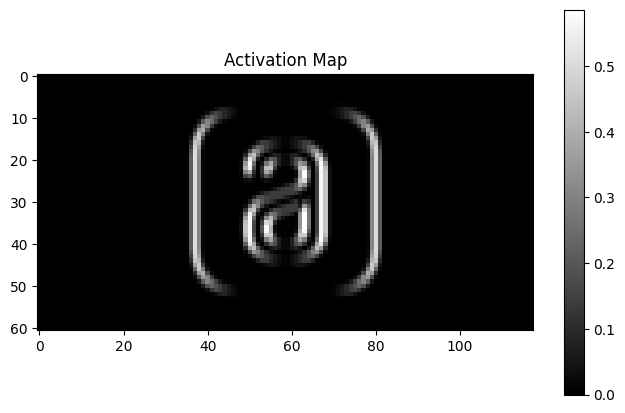

In [ ]:
# Read and process the image
img = io.imread('1200x630wa.png')

# Discard the alpha channel if it exists
if img.shape[2] == 4:
    img = img[:, :, :3]

img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0] // 10, img.shape[1] // 10))

# Define a vertical kernel (you need to provide the kernel_v)
# kernel_v = ...

# Convolve the image with the vertical kernel
saida = convolve(img, kernel_v, 'valid')

# Plot the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

# Plot the activation map
plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida), cmap='gray')
plt.colorbar()
plt.title('Activation Map')


Note that the absolute value of the kernel's activation is high when it finds a good match for its pattern, but also when it encounters the pattern opposite to what it carries. In the latter case, its activation has a negative sign.